## [Lab 8] Support Vector Machines
> ### 0. Introduction
> Support Vector Machine (SVM) is a powerful supervised  machine learning algorithm used for linear or nonlinear classification, regression, and even outlier detection tasks. SVMs can be used for a variety of tasks, such as text classication, image classification, spam detection and else. SVMs are highly adaptable and efficient in a variety of applications because they can manage high dimensional data and nonlinear relationships. SVM algorithms are very effective as we try to find the maximum separating hyerplane between the different classes available in the target feature. The dimension of the hyperplane depends upon the number of features. If the number of input features is two, then the hyperplane is just a line. If the number of input features is three, then the hyperplane becomes a 2-D plane. One additional thing about the SVMs is that it detects and discards the outliers that are bound to occur in different parts separated by the hyperplanes.



---

**Goal** of this laboratory session is to train the model for email spam detection. It should be trained using the SVM algorithm. The idea firstly is to try to find a linear decision boundary that separates the data best. The best hyperplane is the one that yields the largest margin between both classes. Later, we will implement the Gaussian kernel as well.

---

A visualization of the SVM can be seen on the figure below.

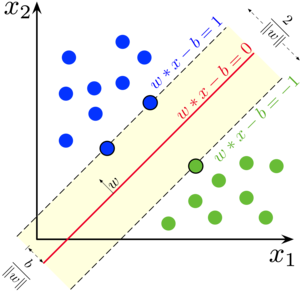

#### Dataset Explanation

The dataset that we are going to use contains 5728 rows and two columns: The first one contains the email records, which will be preprocessed. You can download it from the following [Google Drive link](https://drive.google.com/file/d/1TNIT5E9UnOjUFDKRTn__Meu0Jf8aeTwW/view?usp=sharing), or from the [LMS](https://learning.ibu.edu.ba/mod/resource/view.php?id=83082). The second column is the label, displaying if the email record is spam or not. On the figure below, you can see a sneak peek into the dataset.


Yet again, for all the helper methods, you can use the following [helper notebook](https://colab.research.google.com/drive/1AyPkxjl5EndOdhlqpY_S_EyhcOTitDFd#scrollTo=2sWtSHs9UMl8).

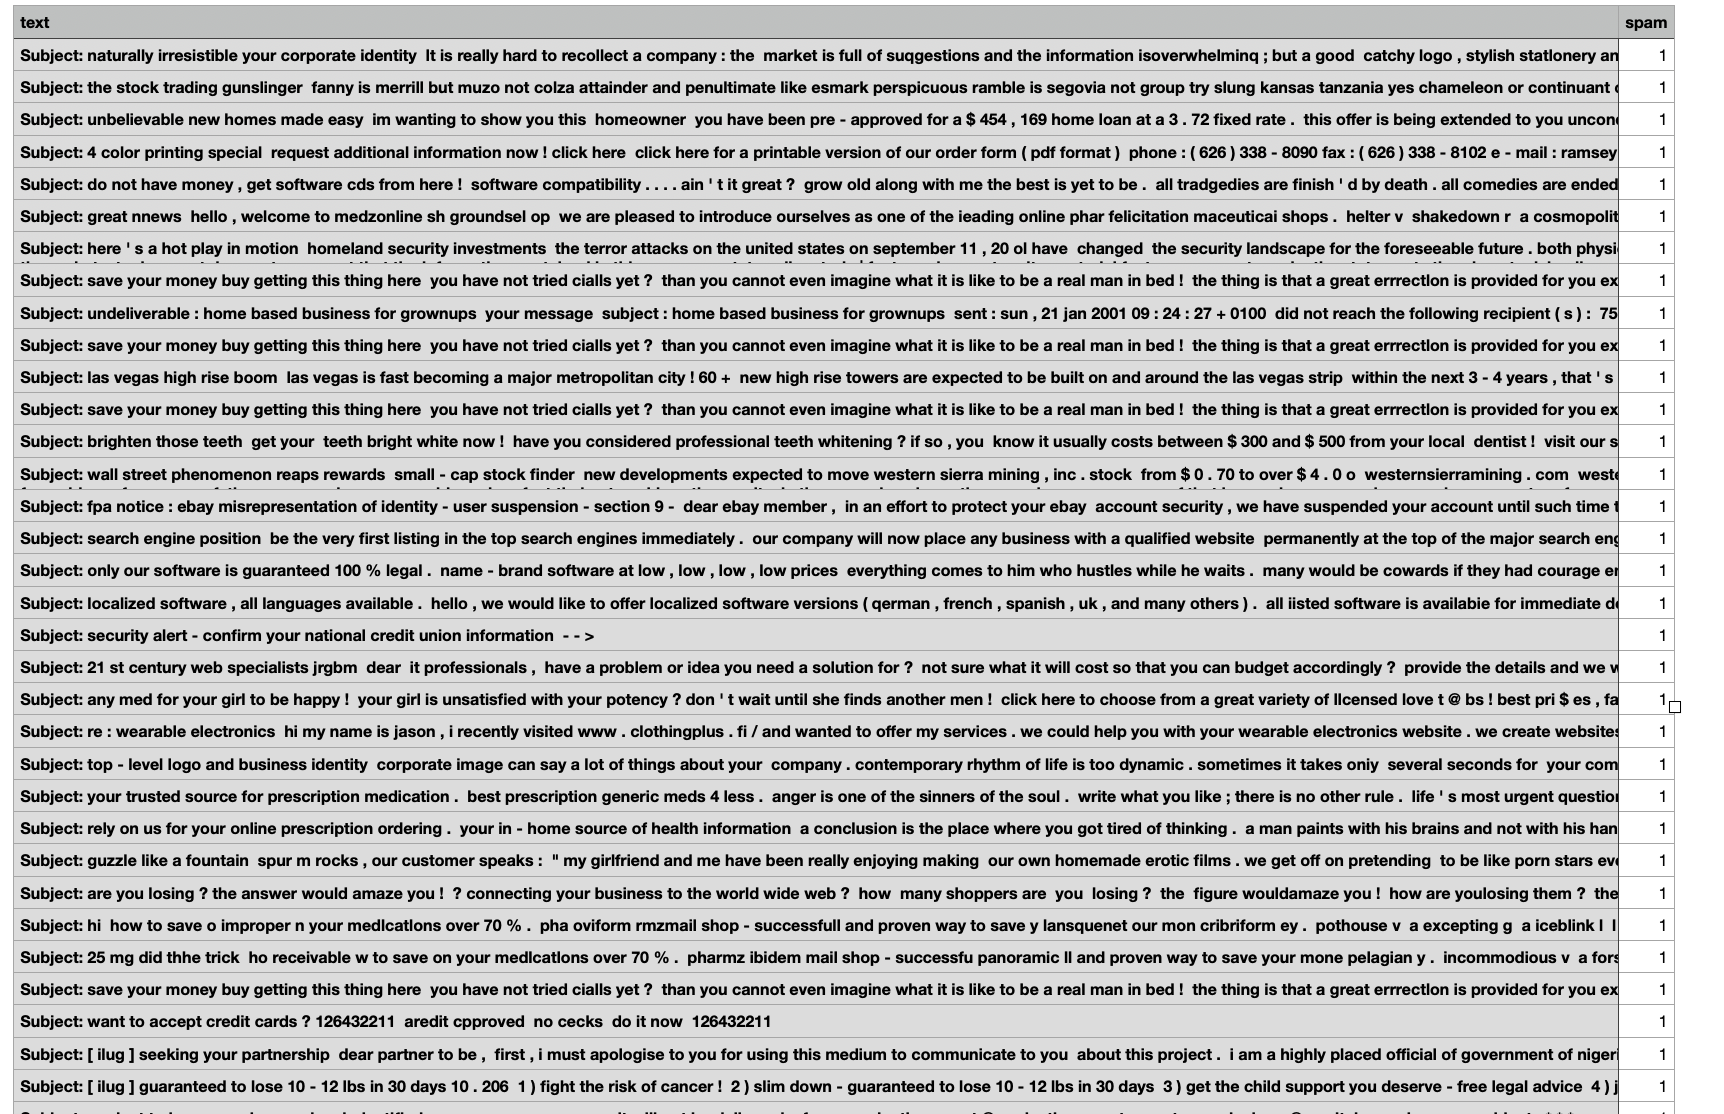

In [1]:
def is_number(s):
    if s is None: return False
    try:
        complex(s)
    except ValueError:
        return False

    return True

In [20]:
def read_file(file_path, offset=1):
    try:
        with open(file_path, 'r') as file:
            data = []
            lines = file.readlines()

            keys = lines[0].split(',')
            for i in range(offset, len(lines)):
                data_row = [
                    float(cell.strip('\n')) if is_number(cell.strip('\n')) else cell.strip('\n')
                    for cell in lines[i].split(',')
                ]
                data.append(data_row)
            return data
    except FileNotFoundError:
        raise RuntimeError("File not found.")
    except Exception as e:
        raise RuntimeError(f"An error occurred: {e}")

In [21]:
X = read_file('./sample_data/emails.csv')


### 1. Preprocessing and Binary Feature Vector

> Firstly, split the dataset into X input features dataset and Y label dataset. In this section, we are going to preprocess the dataset and then to create a binary feature vector. To preprocess the dataset, do the following:
> The function should take a raw email as a parameter and output the list of indexes of spam words that occur in the email. First, convert all uppercase letters into lowercase. Then strip all HTML (anything that starts with < and ends with >), replace numbers with “number”, replace URLs with “httpaddr”, replace email addresses with “emailaddr”, and replace dollar signs ($) with “dollar”. Tokenize all the words. Remove any type of punctuation and non-alphanumeric characters.

> A bit of a **tip**: You are allowed to use the *nltk* library, regex expressions or anything you find suitable to achieve the aforementioned goal. You can play around a bit and explore the options that this library has, that could help you for some of the tasks below. :)

>After you finish the first part, you should create the binary feature vector. Firstly, make a spam_vocabulary by adding all the distinct words from the dataset to this new dataset. You can use the dictionary, where the key would be the index of the word in that dataset and the value to be the word itself. After that, make a binary feature vector. If the word in the record in the original dataset occurs in the vocabulary dataset, put 1. If it doesn't, put 0. This will create a huge dataset which will have columns depending on the number of the distinct words.

In [22]:
def replace_numbers(raw_email):
    # Replace numbers with "number"
    words = []
    word = ''
    for char in raw_email:
        if char.isdigit():
            word += 'number'
        else:
            if word:
                words.append(word)
                word = ''
            words.append(char)
    if word:
        words.append(word)
    return ''.join(words)


In [23]:
def replace_urls(raw_email):
    # Replace URLs with "httpaddr"
    words = []
    word = ''
    i = 0
    while i < len(raw_email):
        if raw_email[i:i+7] == 'http://' or raw_email[i:i+8] == 'https://':
            words.append('httpaddr')
            i += 7 if raw_email[i:i+7] == 'http://' else 8
        else:
            words.append(raw_email[i])
            i += 1
    return ''.join(words)

def replace_emails(raw_email):
    # Replace email addresses with "emailaddr"
    words = []
    i = 0
    while i < len(raw_email):
        if raw_email[i:i+1] == '@':
            words.append('emailaddr')
            i += 1
        else:
            words.append(raw_email[i])
            i += 1
    return ''.join(words)

def tokenize(raw_email):
    # Tokenize words
    words = []
    word = ''
    for char in raw_email:
        if char.isalnum() or char == '_':
            word += char
        else:
            if word:
                words.append(word)
                word = ''
            if char != ' ':
                words.append(char)
    if word:
        words.append(word)
    return words


In [5]:
def preprocess_email(raw_email):
  pass

In [3]:
def preprocess_email(raw_email):
    # Convert to lowercase
    raw_email = raw_email.lower()

    # Remove HTML tags
    while '<' in raw_email:
        start = raw_email.find('<')
        end = raw_email.find('>')
        if start >= 0 and end >= 0:
            raw_email = raw_email[:start] + ' ' + raw_email[end+1:]
        else:
            break

    # Replace numbers with "number"
    raw_email = replace_numbers(raw_email)

    # Replace URLs with "httpaddr"
    raw_email = replace_urls(raw_email)

    # Replace email addresses with "emailaddr"
    raw_email = replace_emails(raw_email)

    # Replace dollar signs with "dollar"
    raw_email = raw_email.replace('$', 'dollar')

    # Tokenize words
    words = tokenize(raw_email)

    return words


In [2]:
def binary_feature_vector(preprocessed_email, spam_vocabulary):
  pass

In [1]:
def binary_feature_vector(preprocessed_email, spam_vocabulary):
    feature_vector = [0] * len(spam_vocabulary)

    for word in preprocessed_email:
        if word in spam_vocabulary:
            index = spam_vocabulary.index(word)
            feature_vector[index] = 1

    return feature_vector

In [4]:
raw_email = "Hello <b>world</b>, this is an example email 123 with a https://example.com and an email address test@example.com. Please pay $10.00."
spam_vocabulary = ['hello', 'world', 'example', 'email', 'httpaddr', 'emailaddr', 'dollar']
# Preprocess the email
preprocessed_email = preprocess_email(raw_email)
print("Preprocessed Email:", preprocessed_email)

# Create binary feature vector
feature_vector = binary_feature_vector(preprocessed_email, spam_vocabulary)
print("Binary Feature Vector:", feature_vector)

NameError: name 'replace_numbers' is not defined

### 2. SVM & Gradient Computation

> Since we know that with the Support Vector Machines, we are always working with the intervals from $- \infty $ to -1 and from 1 to $+ \infty$, we need to change our 0's to -1's. After that, we will initialize the value of our weight. It will have as many records as our original dataset and only one column. You can use the *generate* function below, to fill the weights with the small values between 0 and 1. Furthermore , the bias will initially be set to 0, and it will be changed in the model training process. The bias term allows the SVM to capture more complex patterns in the data by allowing the decision boundary to not necessarily pass through the origin. It essentially shifts the hyperplane away from the origin, affecting the classification decision.

>  In the functions below, we should firstly check the two conditions, for the left hyperplane and for the right one, just to see if we are on the correct side, or to be more precise, if $ y(wx + b) ≥ 1 $ and vice versa.

> If $ y_i (wx_i + b) ≥ 1 $, the cost function together with the regularization looks like this: $ \lambda  \| \mathbf{w} \|^2 $, for a specific record. On the other hand, if $ y_i (wx_i + b) \leq -1 $, the loss function looks like this: $ \lambda  \| \mathbf{w} \|^2 + 1 - y_i (w  \cdot  x_i - b)$.


In [5]:
def generate(rows, columns, default_value=0, rand = False):
  A = []
  for i in range(rows):
    if rand :
      A.append([round(random.uniform(0,1),2) for i in range(columns)])
    else :
      A.append([default_value for i in range(columns)])
  return A

In [9]:
def svm_cost(w, b, lambd, x, y):
    cost = 0

    for i in range(len(x)):
        decision = y[i] * (sum(w[j] * x[i][j] for j in range(len(w))) + b)

        if decision >= 1:
            cost += lambd * sum(w[j] ** 2 for j in range(len(w)))
        else:
            cost += lambd * sum(w[j] ** 2 for j in range(len(w))) + (1 - y[i] * (sum(w[j] * x[i][j] for j in range(len(w))) - b))

    return cost

In [11]:
w = [0.5, 0.3]
b = 0.1
lambd = 0.01
x = [[0.1, 0.2], [0.3, 0.4]]
y = [1, -1]

cost = svm_cost(w, b, lambd, x, y)
print(cost)

2.1668


> To compute the gradients, we just do the partial derivatives for the weights and bias. In case where $ y_i (wx_i + b) ≥ 1 $, the gradient of w is $ 2 \lambda  w_k $, where the derivative of the b is still 0. On the other hand, if $ y_i (wx_i + b) \leq -1 $, the gradient is: $2 \lambda \ w_k - y_i \cdot x_i.$ The gradient for b is $y_i$.

In [14]:
def svm_gradient(w, b, lambd, x, y):
    grad_w = [0] * len(w)
    grad_b = 0

    for i in range(len(x)):
        decision = y[i] * (sum(w[j] * x[i][j] for j in range(len(w))) + b)

        if decision >= 1:
            grad_w = [2 * lambd * w[j] for j in range(len(w))]
        else:
            grad_w = [2 * lambd * w[j] - y[i] * x[i][j] for j in range(len(w))]
            grad_b = -y[i]

    return grad_w, grad_b

In [15]:
# Given preprocessed email, binary feature vector, weight vector, bias, lambda, and cost
preprocessed_email = ['hello', 'world', ',', 'this', 'is', 'an', 'example', 'email', 'numbernumbernumber', 'with', 'a', 'httpaddrexample', '.', 'com', 'and', 'an', 'email', 'address', 'testemailaddrexample', '.', 'com', '.', 'please', 'pay', 'dollarnumbernumber', '.', 'numbernumber', '.']
binary_feature_vector = [1, 1, 1, 1, 0, 0, 0]
w = generate(1, len(binary_feature_vector))[0]  # Initialize weight vector
b = 0  # Initialize bias
lambd = 0.1  # Regularization parameter
cost = 1.0

# Example usage of svm_gradient function
grad_w, grad_b = svm_gradient(w, b, lambd, [binary_feature_vector], [1])  # Assuming label for this example is 1
print("Gradient for weights:", grad_w)
print("Gradient for bias:", grad_b)

Gradient for weights: [-1.0, -1.0, -1.0, -1.0, 0.0, 0.0, 0.0]
Gradient for bias: -1


### 4. Training the SVM model
> Since we have obtained the value of gradients, now, we can simply just train our model with the number of iterations and learning rate that we specify.

> $w = w - \alpha \ \cdot dw $

> $b = b - \alpha \ \cdot db $

A bit of a **note**: Do not forget to check for the hyperplanes again :)

In [17]:
def svm_train(x,
              y,
              w_init=0,
              b_init=0,
              learning_rate=0.0001,
              num_iterations=1000,
              logging=False):
    # Initialize weights and bias
    w = w_init
    b = b_init

    # Iterate for the specified number of iterations
    for i in range(num_iterations):
        # Compute gradients
        grad_w, grad_b = svm_gradient(w, b, lambd, x, y)

        # Update weights and bias using the gradients and learning rate
        w = [w[j] - learning_rate * grad_w[j] for j in range(len(w))]
        b -= learning_rate * grad_b

        # Logging
        if logging and (i + 1) % 100 == 0:
            print(f"Iteration {i+1}: Cost = {svm_cost(w, b, lambd, x, y)}")

    return w, b

In [18]:
# Generate synthetic data
import random

# Generate random data points
num_points = 1000
x = [[random.uniform(-10, 10), random.uniform(-10, 10)] for _ in range(num_points)]
y = [1 if point[0] + 2 * point[1] - 5 >= 0 else -1 for point in x]  # Linearly separable data

In [19]:
# Initialize weights and bias
w_init = [0, 0]  # Initialize weight vector
b_init = 0  # Initialize bias

# Set hyperparameters
learning_rate = 0.001
num_iterations = 1850
logging = True

# Train the SVM model
trained_w, trained_b = svm_train(x, y, w_init, b_init, learning_rate, num_iterations, logging)


Iteration 100: Cost = 689.9093221142082
Iteration 200: Cost = 711.3297717703009
Iteration 300: Cost = 721.3547743508117
Iteration 400: Cost = 720.726786374811
Iteration 500: Cost = 698.3216478590087
Iteration 600: Cost = 665.5953682351196
Iteration 700: Cost = 594.5019261123374
Iteration 800: Cost = 504.55501808777166
Iteration 900: Cost = 382.82820179353314
Iteration 1000: Cost = 222.82990970476908
Iteration 1100: Cost = 189.9767657205106
Iteration 1200: Cost = 192.24470581179744
Iteration 1300: Cost = 203.00033407511393
Iteration 1400: Cost = 203.15516392332034
Iteration 1500: Cost = 203.26737376684565
Iteration 1600: Cost = 203.3377519385849
Iteration 1700: Cost = 203.3672130368861
Iteration 1800: Cost = 205.380524455931


### 5. Visualizing the boundaries
> As we mentioned before, during the training process of an SVM, both the weight vector w and the bias term b are learned from the training data to find the optimal hyperplane that maximally separates the classes while minimizing classification errors. In this part, you should visualize the optimal hyperplane using the *matplotlib* library.

> A bit of a **tip**: You can write a helper method to obtain the hyperplane value, and then to use the plotting functions (for example: .scatter and .add_sublot).

In [20]:
import matplotlib.pyplot as plt

def visualize_boundary(x, w, b):
  pass

In [21]:
import matplotlib.pyplot as plt

def visualize_boundary(x, w, b):
    # Extract x and y coordinates
    x_coords = [point[0] for point in x]
    y_coords = [point[1] for point in x]

    # Plot data points
    plt.scatter(x_coords, y_coords, c=y, cmap='coolwarm')

    # Plot the hyperplane (decision boundary)
    min_x = min(x_coords)
    max_x = max(x_coords)
    min_y = (-w[0] * min_x - b) / w[1]
    max_y = (-w[0] * max_x - b) / w[1]
    plt.plot([min_x, max_x], [min_y, max_y], '-r')

    # Set labels and title
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('Optimal Hyperplane')

    # Show plot
    plt.show()

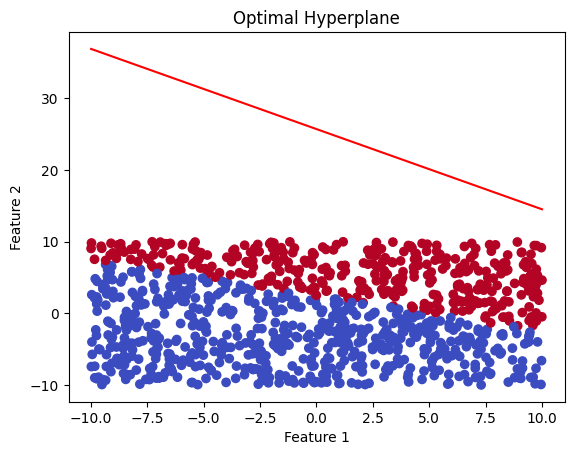

In [22]:
visualize_boundary(x,trained_w, trained_b)

### 6. Model Evaluation
> To evaluate the performance of the model you have developed, you can calculate the accuracy.

> A bit of a **note**: You can use a smaller batch size to calculate the accuracy, to avoid having a painful and long runtime, due to a dataset size.

> $ \text{Accuracy} = \frac{\text{Correct Predictions}}{\text{Total Predictions}} $


In [23]:
 def accuracy(y_true, y_pred):
  pass

In [24]:
def accuracy(y_true, y_pred):
    correct_predictions = 0

    # Iterate through each true label and predicted label
    for true_label, pred_label in zip(y_true, y_pred):
        # If the true label matches the predicted label, increment correct predictions
        if true_label == pred_label:
            correct_predictions += 1

    # Calculate accuracy
    total_predictions = len(y_true)
    accuracy = correct_predictions / total_predictions if total_predictions > 0 else 0

    return accuracy

In [25]:
# Predict labels using the trained model
y_pred = [1 if w[0]*point[0] + w[1]*point[1] - trained_b >= 0 else -1 for point in x]

# Calculate accuracy
accuracy_score = accuracy(y, y_pred)
print("Accuracy:", accuracy_score)

Accuracy: 0.371


### 7. Gaussian Kernel

> The Gaussian kernel is a similarity function that measures the “distance” between a pair of examples ($ x_i $, $ x_j$). The Gaussian kernel is also parameterized by a bandwidth parameter, $ σ $, which determines how fast the similarity metric decreases (to 0) as the examples are further apart. To calculate the Gaussian kernel, we use the following equation:
> $K(x_i, x_j) = \exp \left( -\frac{{\| x_i - x_j \|^2}}{{2\sigma^2}} \right)
$.

In [26]:
def gaussian_kernel(x_i, x_j, sigma):
  pass

In [27]:
def gaussian_kernel(x_i, x_j, sigma):
    # Calculate the squared Euclidean distance between x_i and x_j
    squared_distance = sum((x_i[dim] - x_j[dim]) ** 2 for dim in range(len(x_i)))

    # Calculate the Gaussian kernel value using the squared distance and sigma
    kernel_value = math.exp((-1) * squared_distance / (2 * sigma ** 2))

    return kernel_value

In [28]:
import math

# Example data points
x_i = [1, 2, 3]
x_j = [4, 5, 6]

# Sigma value
sigma = 1.0

# Compute the Gaussian kernel value
kernel_value = gaussian_kernel(x_i, x_j, sigma)
print("Gaussian Kernel Value:", kernel_value)


Gaussian Kernel Value: 1.3709590863840845e-06


> To play a bit and test how the Gaussian kernel performs, you can use the [Iris dataset](https://drive.google.com/file/d/1G5zuIYOBmox08PvxN3bPZ-daDKUnBTOK/view?usp=sharing), the [scikit learn documentation link](https://scikit-learn.org/stable/auto_examples/gaussian_process/plot_gpc_iris.html) and the [additional link](https://medium.com/@gallettilance/support-vector-machines-16241417ee6d).


---

 *Optional*: You can try to visualize the Gaussian kernel as well by modifying the visualize_boundary method above.

---



Gaussian Kernel Value: 1.3709590863840845e-06


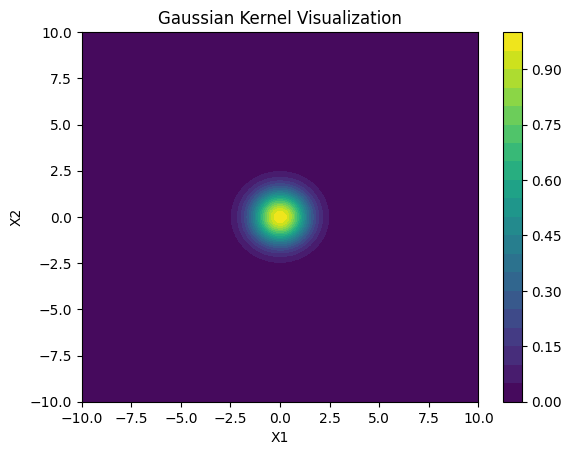

In [30]:
import numpy as np
import matplotlib.pyplot as plt

def gaussian_kernel(x_i, x_j, sigma):
    # Calculate the squared Euclidean distance between x_i and x_j
    squared_distance = np.sum((x_i - x_j) ** 2)

    # Calculate the Gaussian kernel value using the squared distance and sigma
    kernel_value = np.exp((-1) * squared_distance / (2 * sigma ** 2))

    return kernel_value

# Data points
x_i = np.array([1, 2, 3])
x_j = np.array([4, 5, 6])

# Sigma value
sigma = 1.0

# Compute the Gaussian kernel value
kernel_value = gaussian_kernel(x_i, x_j, sigma)
print("Gaussian Kernel Value:", kernel_value)

# Visualize the Gaussian kernel
x_range = np.linspace(-10, 10, 100)
y_range = np.linspace(-10, 10, 100)
X, Y = np.meshgrid(x_range, y_range)
Z = np.zeros_like(X)

for i in range(X.shape[0]):
    for j in range(X.shape[1]):
        Z[i, j] = gaussian_kernel(np.array([X[i, j], Y[i, j]]), np.array([0, 0]), sigma)

plt.contourf(X, Y, Z, levels=20)
plt.colorbar()
plt.xlabel("X1")
plt.ylabel("X2")
plt.title("Gaussian Kernel Visualization")
plt.show()